### Import Libraries

In [24]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
from sklearn.metrics import accuracy_score

**Dot Products**

In [25]:
x = np.arange(3)
x

array([0, 1, 2])

In [26]:
y = np.arange(3, 6)
y

array([3, 4, 5])

In [27]:
# Multiplication
x*y

array([ 0,  4, 10])

In [28]:
# Addition
np.sum(x * y)

14

In [29]:
# Dot Product
x@y

14

### Import Dataset

In [30]:
from sklearn.datasets import load_breast_cancer

In [31]:
# Brest Cancer Dataset
df = load_breast_cancer()

In [32]:
features = df["data"]

X = pd.DataFrame(features)

X.columns = df["feature_names"]
X[::50]

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
50         11.76         21.60           74.72      427.9          0.08637   
100        13.61         24.98           88.05      582.7          0.09488   
150        13.00         20.78           83.51      519.4          0.11350   
200        12.23         19.56           78.54      461.0          0.09586   
250        20.94         23.56          138.90     1364.0          0.10070   
300        19.53         18.90          129.50     1217.0          0.11500   
350        11.66         17.07           73.70      421.0          0.07561   
400        17.91         21.02          124.40      994.0          0.12300   
450        11.87         21.54           76.83      432.0          0.06613   
500        15.04         16.74           98.73      689.4          0.09883   
550        10.86         21.48           68.51      360.5          0.07431   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760        0.300100              0.14710         0.2419   
50            0.04966        0.016570              0.01115         0.1495   
100           0.08511        0.086250              0.04489         0.1609   
150           0.07589        0.031360              0.02645         0.2540   
200           0.08087        0.041870              0.04107         0.1979   
250           0.16060        0.271200              0.13100         0.2205   
300           0.16420        0.219700              0.10620         0.1792   
350           0.03630        0.008306              0.01162         0.1671   
400           0.25760        0.318900              0.11980         0.2113   
450           0.10640        0.087770              0.02386         0.1349   
500           0.13640        0.077210              0.06142         0.1668   
550           0.04227        0.000000              0.00000         0.1661   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...         25.38          17.33   
50                  0.05888  ...         12.98          25.72   
100                 0.05871  ...         16.99          35.27   
150                 0.06087  ...         14.16          24.11   
200                 0.06013  ...         14.44          28.36   
250                 0.05898  ...         25.58          27.00   
300                 0.06552  ...         25.93          26.24   
350                 0.05731  ...         13.28          19.74   
400                 0.07115  ...         20.80          27.78   
450                 0.06612  ...         12.79          28.18   
500                 0.06869  ...         16.76          20.43   
550                 0.05948  ...         11.66          24.77   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
50             82.98       516.5           0.10850            0.08615   
100           108.60       906.5           0.12650            0.19430   
150            90.82       616.7           0.12970            0.11050   
200            92.15       638.4           0.14290            0.20420   
250           165.30      2010.0           0.12110            0.31720   
300           171.10      2053.0           0.14950            0.41160   
350            83.61       542.5           0.09958            0.06476   
400           149.60      1304.0           0.18730            0.59170   
450            83.51       507.2           0.09457            0.33990   
500           109.70       856.9           0.11350            0.21760   
550            74.08       412.3           0.10010            0.07348   

     worst concavity  worst concave points  worst symmetry  \
0            0.71190               0.26540          0.4601   
50           0.05523               0.03715          0.2433   
100   

In [33]:
y = df["target"]
y[::50]

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [34]:
# Logistic Regression Object
lr = LogisticRegression()

# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

# Fit Data in Model
lr.fit(x_train, y_train)

# Prediction
y_pred = lr.predict(x_test)

pd.DataFrame({"Actual": y_test, "Predicted": y_pred})[::40]

Actual  Predicted
0         1          1
40        1          1
80        1          1
120       1          1
160       0          0

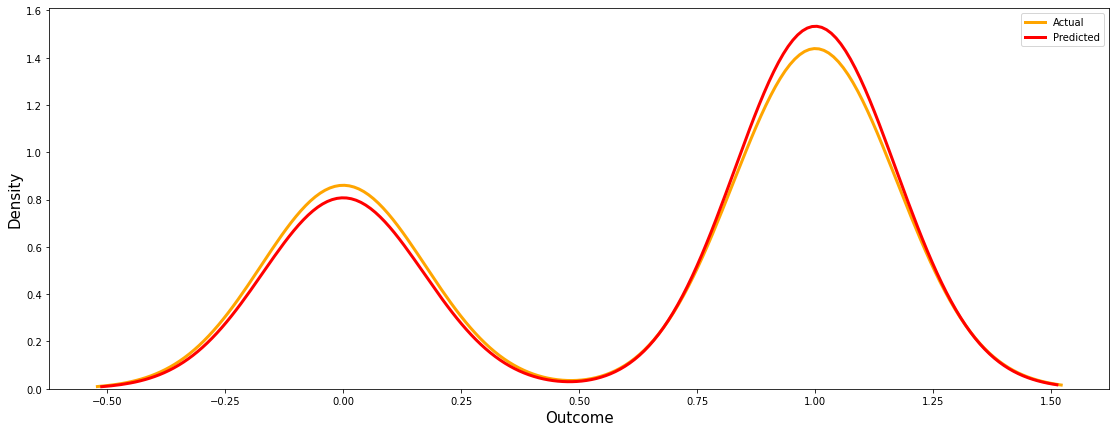

In [35]:
plt.figure(figsize = (19, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(x = y_pred, label = "Predicted", linewidth = 3, color = "red")
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

**Accuracy on Training**

In [36]:
score = lr.score(x_train, y_train)
print("Accuracy Score on Train Model =", score)

Accuracy Score on Train Model = 0.9522613065326633


**Accuracy on Training**

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score on Testing =", accuracy)

Accuracy Score on Testing = 0.9473684210526315


**Print the number of errors**

In [38]:
num_err = np.sum(y_test != y_pred)
print("Number of errors:", num_err)

Number of errors: 9
